In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


salaries= pd.read_csv("/content/drive/MyDrive/dataset/salaries.csv")

# Check the first 5 rows of the dataset
(salaries.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Scientist,100000,USD,100000,US,100,US,M
1,2023,MI,FT,Machine Learning Engineer,45000,EUR,48585,IT,100,GB,M
2,2023,MI,FT,Data Analyst,142000,USD,142000,US,0,US,M
3,2023,MI,FT,Data Analyst,128000,USD,128000,US,0,US,M
4,2023,SE,FT,ETL Developer,99500,USD,99500,US,0,US,M


In [4]:
# Check the last 5 rows of the dataset
salaries.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7361,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
7362,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
7363,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
7364,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
7365,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
# Check data types of each column
salaries.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

work_year, salary, salary_in_usd are *integer* type of data which is suitable. Other type of data is *object* and it indicates generally they are categorical data. We need to check the categories as well.

In [6]:
# Check unique values for each column

for column in salaries.columns:
    print(column, ":", salaries[column].unique())

work_year : [2023 2020 2022 2021]
experience_level : ['EN' 'MI' 'SE' 'EX']
employment_type : ['FT' 'CT' 'PT' 'FL']
job_title : ['Data Scientist' 'Machine Learning Engineer' 'Data Analyst'
 'ETL Developer' 'Data Engineer' 'Research Scientist' 'Research Engineer'
 'Data Architect' 'Azure Data Engineer' 'Data Manager'
 'Decision Scientist' 'Machine Learning Infrastructure Engineer'
 'Data Analytics Manager' 'Business Intelligence Analyst'
 'Analytics Engineer' 'BI Developer' 'Data Lead' 'Applied Scientist'
 'Business Intelligence Engineer' 'Machine Learning Scientist'
 'ML Engineer' 'AI Engineer' 'Data Developer' 'AI Developer'
 'Principal Data Scientist' 'Data Science Lead' 'Business Data Analyst'
 'Machine Learning Researcher' 'Head of Data' 'Staff Data Analyst'
 'Research Analyst' 'Data Infrastructure Engineer'
 'Machine Learning Software Engineer'
 'Machine Learning Operations Engineer' 'AI Scientist'
 'AI Research Engineer' 'Head of Machine Learning' 'BI Analyst'
 'Data Specialist' '

Identifying categorical data is essential to understand and planning to analyze the data. Now we now which catorical data we have.
Job_title column seems a bit of complicated. It contains a wide range of job titles. We can group of similar type of job titles later.

In [7]:
# Summary statistics for numerical variables
salaries.describe()




,work_year,salary,salary_in_usd,remote_ratio
count,7366.000000,7.366000e+03,7366.000000,7366.000000
mean,2022.686261,1.782110e+05,148570.102498,40.673364
std,0.579340,4.945834e+05,63913.438628,48.380788
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2022.000000,1.052000e+05,105000.000000,0.000000
50%,2023.000000,1.440000e+05,142200.000000,0.000000
75%,2023.000000,1.893275e+05,185900.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


When we consider summary statistics for 'salary_in_usd' column, the mean salary in USD is $148,570, with a standard deviation of 63,913. It indicates, there are high range of salaries in the dataset.
While the minimum salary in USD is 15,000, the maximum salary is 450,000.

We can visualize the distribution of the salaries to understand better the characteristics. bold text

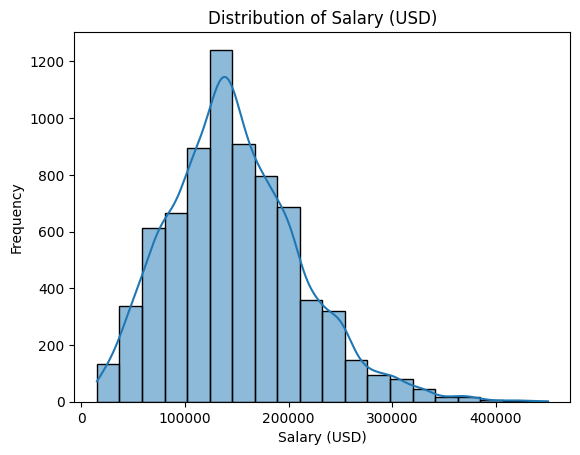

In [8]:

# Create a histogram with kernel denstiy estimate (kde)
sns.histplot(salaries['salary_in_usd'], bins= 20, kde=True)
plt.title('Distribution of Salary (USD)')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()


The KDE histogram indicates a distribution of a right-skewed with a long tail along with higher salary values. This suggest that there are some individuals who have higher salaries than majority of population.

The peak of the distribution appears around of the lower salary range, indicating that significant of the population have salaries within the range.

There may be some outlier at the higher end of the distribution which may cause of right long tail.

In [9]:
# Check for missing values
missing_values= salaries.isnull().sum()
missing_values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missing values in any columns

In [10]:
# Calculate IQR
q1 = salaries['salary_in_usd'].quantile(0.25)
q3= salaries['salary_in_usd'].quantile(0.75)
IQR= q3 - q1

# Define lower and upper bound
lower_bound = q1 - 1.5 * IQR
higher_bound= q3 + 1.5 * IQR


# Identify the outliers
outliers = (salaries['salary_in_usd'] < lower_bound) | (salaries['salary_in_usd'] > higher_bound)



There are 129 outliers. Some values are notably higher than others, such as $450,000. Outliers may appear several reasons, such as high level executive salaries, one time bonusses or data entry errors. However, I do not analyze the reason of outliers, instead I will focus other analysis.

In [11]:
# Create Job title mapping
job_title_mapping= {
    'Data Scientist': ['Data Scientist', 'Applied Data Scientist', 'Data Science Practitioner', 'Data Science Consultant', 'Staff Data Scientist'],
    'Data Analyst': ['Data Analyst', 'Staff Data Analyst', 'Data Operations Analyst', 'Data Quality Analyst', 'Product Data Analyst', 'Sales Data Analyst', 'Data Analytics Specialist', 'Data Analytics Consultant', 'Finance Data Analyst', 'Financial Data Analyst', 'Compliance Data Analyst', 'Marketing Data Analyst'],
    'Data Engineer': ['Data Engineer', 'Data Architect', 'Data Infrastructure Engineer', 'Data Operations Engineer', 'Software Data Engineer', 'Data Analytics Engineer', 'Big Data Architect', 'Big Data Engineer', 'Consultant Data Engineer', 'Data Quality Engineer', 'Marketing Data Engineer'],
    'Data Specialist': ['Data Developer', 'Data Specialist', 'Data Strategist', 'Data Modeler', 'Data Integration Specialist', 'Data Management Specialist', 'Data Visualization Engineer', 'Data Visualization Specialist', 'Data Science Engineer', 'Data Modeller', 'Data Operations Specialist', 'Data Visualization Analyst'],
    'Data Manager': ['Data Manager', 'Data Analytics Manager', 'Data Lead', 'Principal Data Scientist', 'Data Science Lead', 'Head of Data', 'Director of Data Science', 'Data Science Manager', 'Data Analytics Lead', 'Lead Data Scientist', 'Principal Data Engineer', 'Head of Data Science', 'Data Operations Manager', 'Managing Director Data Science', 'Lead Data Engineer', 'Principal Data Analyst', 'Data Scientist Lead', 'Lead Data Analyst', 'Data Science Tech Lead', 'Manager Data Management', 'Principal Data Architect', 'Data Strategy Manager'],
    'Machine Learning Engineer': ['Machine Learning Engineer', 'Machine Learning Infrastructure Engineer', 'Machine Learning Software Engineer', 'Machine Learning Operations Engineer', 'MLOps Engineer', 'Staff Machine Learning Engineer', 'Machine Learning Research Engineer', 'Applied Machine Learning Engineer', 'ML Engineer', 'Machine Learning Specialist', 'Machine Learning Developer'],
    'Machine Learning Scientist': ['Machine Learning Scientist', 'Applied Machine Learning Scientist', 'Machine Learning Researcher'],
    'Machine Learning Manager': ['Head of Machine Learning', 'Machine Learning Manager', 'Principal Machine Learning Engineer', 'Lead Machine Learning Engineer'],
    'AI Engineer': ['AI Engineer', 'AI Developer', 'AI Scientist', 'AI Research Engineer', 'AI Programmer', 'AI Architect'],
    'BI Analyst': ['BI Analyst', 'Business Intelligence Analyst', 'BI Developer', 'Business Intelligence Engineer', 'Business Intelligence Developer', 'Business Intelligence Data Analyst', 'BI Data Analyst', 'BI Data Engineer', 'Business Data Analyst'],
    'Cloud Data Engineer': ['Cloud Data Architect', 'Cloud Data Engineer', 'Cloud Database Engineer'],
    'ETL Engineer': ['ETL Developer', 'ETL Engineer'],
    'Research Scientist': ['Research Scientist', 'Research Engineer', 'Research Analyst'],
    'Computer Vision Engineer': ['Computer Vision Engineer', 'Computer Vision Software Engineer'],
    'Other':['Azure Data Engineer','Autonomous Vehicle Technician','Power BI Developer','Analytics Engineering Manager','AWS Data Architect','Data DevOps Engineer','Deep Learning Researcher' ]
}

for category, titles in job_title_mapping.items():
    salaries.loc[salaries['job_title'].isin(titles), 'job_title'] = category




Now we have 21 job title categories. We will check the distribution of each category with bar plot.

In [12]:
# Count values for each categories
job_category_count= salaries['job_title'].value_counts()
job_category_count


job_title
Data Engineer                 1974
Data Scientist                1600
Data Analyst                  1160
Machine Learning Engineer      893
Data Manager                   369
Research Scientist             330
BI Analyst                     228
Applied Scientist              208
Analytics Engineer             204
Data Specialist                102
Machine Learning Scientist      87
AI Engineer                     66
Decision Scientist              36
Computer Vision Engineer        29
ETL Engineer                    18
Machine Learning Manager        14
NLP Engineer                    13
Deep Learning Engineer          10
Cloud Data Engineer             10
Other                            9
Insight Analyst                  6
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of People in Each Job Category')

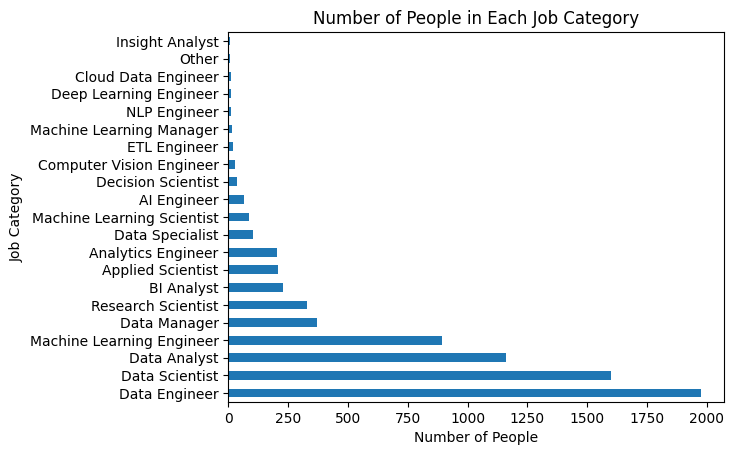

In [15]:
# Create bar plot to show distribution the people for each job category

job_category_count.plot(kind= 'barh')
plt.xlabel('Number of People')
plt.ylabel('Job Category')
plt.title('Number of People in Each Job Category')


Now, I want to test an hypotesis: There is a relationship between work experience and salary.   



*   (H0) There is no significant relationship between work experience and salary. (Correlation coefficient = 0)
*   (H1) As work experience increases, salary increases. (Correlation coefficient > 0)

Now I want to start with some Exploratory Data Analysis, such as plot histograms, calculate summary statistics, and visualize the distribution of salary for different level of experience.

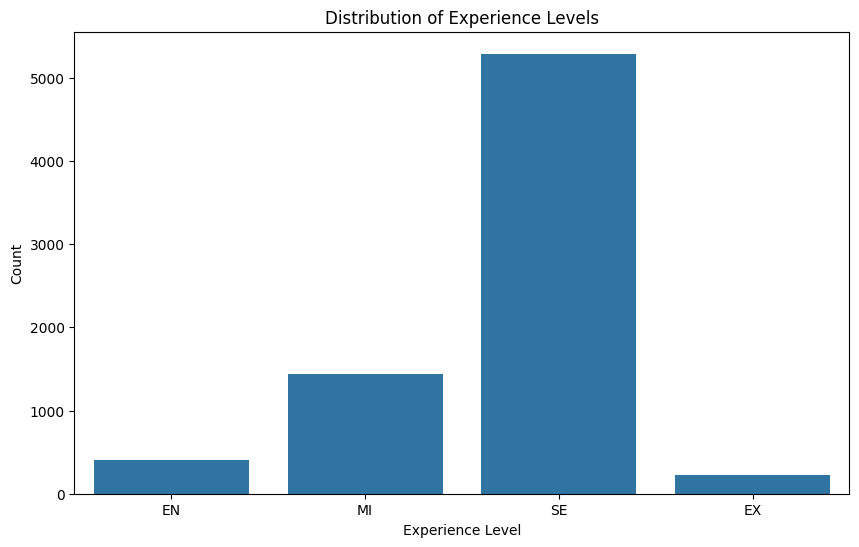

In [16]:
# Plot the distribution of experience level
plt.figure(figsize=(10,6))
sns.countplot(data=salaries, x='experience_level', order=['EN', 'MI', 'SE', 'EX'])
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

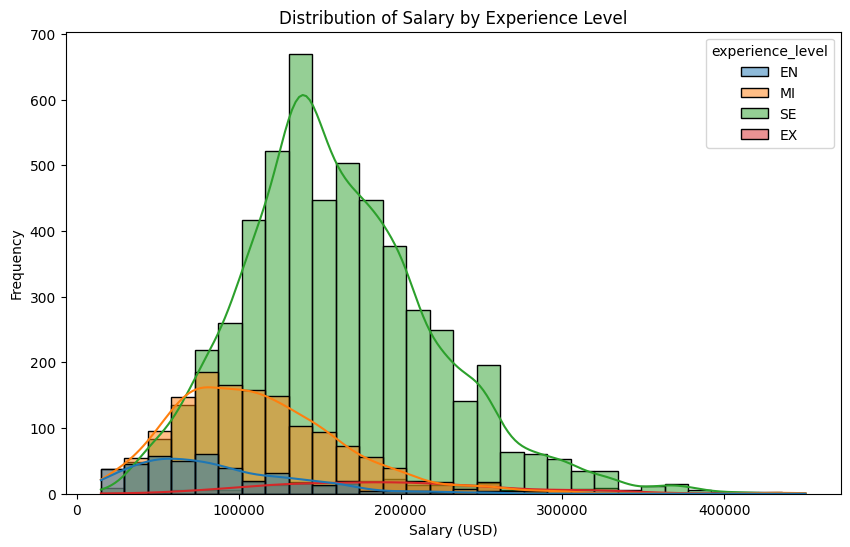

In [19]:
# Create an histogram of salary for each level of experience

plt.figure(figsize=(10, 6))
sns.histplot(data=salaries, x='salary_in_usd', hue='experience_level', kde=True, bins=30)
plt.title('Distribution of Salary by Experience Level')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()


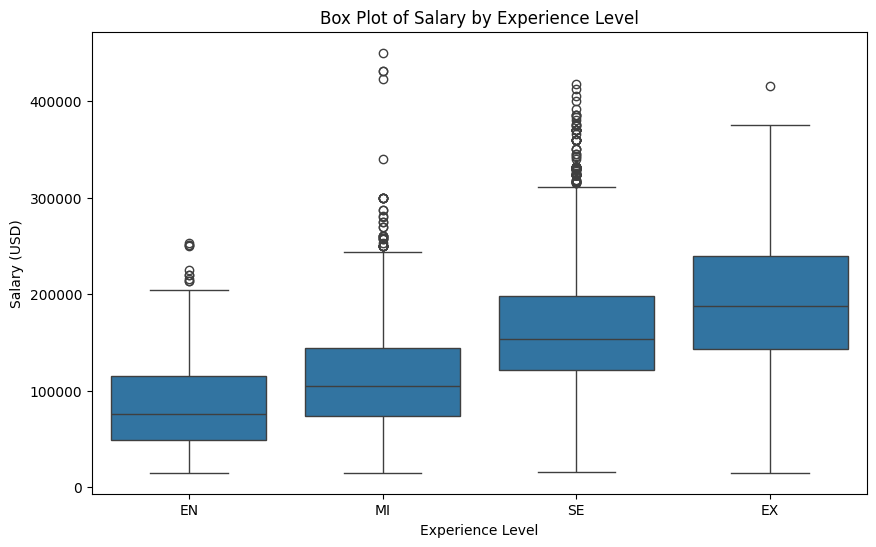

In [20]:
# Plot box plots of salary for each experience level
plt.figure(figsize=(10, 6))
sns.boxplot(data=salaries, x='experience_level', y='salary_in_usd')
plt.title('Box Plot of Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

In [21]:
# Grouping by experience level and calculating summary statistics for salary
summary_stats = salaries.groupby('experience_level')['salary_in_usd'].agg(['mean', 'median', 'std'])

# Displaying the summary statistics
summary_stats


,mean,median,std
experience_level,,,
EN,85087.100000,75500.0,48335.451013
EX,192217.242291,188000.0,70410.918844
MI,112770.811675,105000.0,54801.979291
SE,161355.605293,153699.5,59773.740448


Now, we can see the mean and median of salary increase with the level of experience.

Now it's time to hypothesis testing.

*  (H0) There is no significant relationship between work experience and salary. (Correlation coefficient = 0)
*  (H1) As work experience increases, salary increases. (Correlation coefficient > 0)



Since we have categorical independent variable(the level of experience), and continues dependent variable (salary), we can use ANOVA to test for differences in means across the multiple groups.

In [23]:
!pip install pingouin





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 3.1 MB/s eta 0:00:00


In [24]:
import pingouin as pg

# Perform ANOVA test
anova_result = pg.anova(data=salaries, dv='salary_in_usd', between='experience_level')

anova_result

p_value = anova_result.loc[0, 'p-unc']

print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in salary across experience levels.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in salary across experience levels.")


P-value: 9.31786972993734e-277
Reject the null hypothesis. There is a significant difference in salary across experience levels.


ANOVA results indicated that there is a significant difference in salary across different experience levels (p < 0.05).

To determine which specific groups have significant differences in salaries, we can do post-hoc test.

In [25]:

# Perform pairwise t-tests with Bonferroni correction
pairwise_tests = pg.pairwise_tests(data=salaries, dv='salary_in_usd', between='experience_level', padjust='bonf')

pairwise_tests


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,experience_level,EN,EX,False,True,-20.414665,346.290943,two-sided,2.259403e-61,1.355642e-60,bonf,6.815e+67,-1.871424
1,experience_level,EN,MI,False,True,-9.921664,735.403295,two-sided,7.360674e-22,4.416404e-21,bonf,2.689e+19,-0.517847
2,experience_level,EN,SE,False,True,-30.209820,511.145734,two-sided,8.704437e-116,5.222662e-115,bonf,7.104e+181,-1.291934
3,experience_level,EX,MI,False,True,16.241613,270.868295,two-sided,6.930908e-42,4.158545e-41,bonf,3.496e+51,1.388963
4,experience_level,EX,SE,False,True,6.503967,240.184465,two-sided,4.499226e-10,2.699536e-09,bonf,7.826e+07,0.512186
5,experience_level,MI,SE,False,True,-29.231633,2449.577577,two-sided,2.138026e-161,1.282816e-160,bonf,6.746e+172,-0.826935




*   The comparison between EN (Entry-level) and EX (Executive-level) shows a significant difference in salary (p < 0.001)
*   EN and SE (Senior-level) also shows a significant difference in salary (p < 0.001)
*   The comparison between MI (Mid-level) and SE also shows a significant difference in salary (p < 0.001)


The results suggest that there are significant differences in salary across different experience levels. Entry-level and Mid-level positions tend to have lower salaries compared to Senior-level and Executive-level positions. These findings highlight the importance of experience level in determining salary levels within the organization.